In [93]:
import pandas as pd
import numpy as np 
import matplotlib as mlp 
from matplotlib import pyplot as plt 
import geopandas as gp

import os

os.chdir("../../core")
import GT_helper_functions as hf
import GT_load_data as data

base_dir = "../../Outcome Measurement Data/"

%matplotlib inline

FileNotFoundError: [Errno 2] No such file or directory: '../../core'

In [97]:
pd.options.display.max_columns = 100

In [2]:
rtd = pd.read_csv("../../Resource Tracking/prepped_data/total_resource_tracking_data.csv", 
                  encoding = "latin-1")

/home/guillermo/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
rtd["year_2"] = rtd.start_date.map(lambda x: x[0:4] if type(x) != float else np.NaN)

In [100]:
rtd.financing_source.value_counts()

ghe          114652
gf           107869
other_dah      3450
bil_usa        3321
dah            2070
oop             513
ppp             513
Name: financing_source, dtype: int64

Text(0,0.5,'Disbursement (Millions of $)')

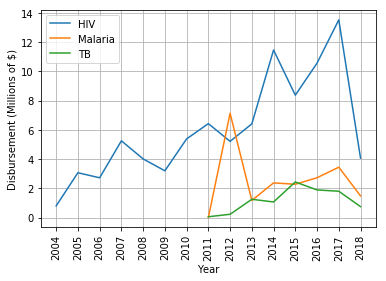

In [103]:
temp = rtd[(rtd.data_source=="sicoin") & 
    (rtd.financing_source.isin(["ghe"]))].groupby([
            "year_2", 
            "disease"
        ])[[
            #"budget" ,
            #"expenditure",
            "disbursement"
        ]].sum().divide(1000000).unstack(1)
temp.columns = ["HIV", "Malaria", "TB"]
ax = plt.subplot(1,1,1)
temp.plot(ax = ax)
ax.set_xticks(range(len(temp)))
ax.set_xticklabels(temp.index, rotation=90)
plt.grid()
ax.set_xlabel("Year")
ax.set_ylabel("Disbursement (Millions of $)")

In [106]:
temp = rtd[(rtd.data_source=="sicoin") & 
    (rtd.financing_source.isin(["ghe"])) &
    (rtd.year_2 == "2012") & 
    (rtd.disease == "malaria")]

"""groupby([
            "intervention"
        ])[[
            #"budget" ,
            #"expenditure",
            "disbursement"
        ]].sum() #.divide(1000000).unstack(1)"""
#temp.columns = ["HIV", "Malaria", "TB"]
#ax = plt.subplot(1,1,1)
#temp.plot(ax = ax)
#ax.set_xticks(range(len(temp)))
#ax.set_xticklabels(temp.index, rotation=90)
#plt.grid()
#ax.set_xlabel("Year")
#ax.set_ylabel("Disbursement (Millions of $)")
temp.module.values[0]

'prevenciondeenfermedadestransmitidasporvectoresmalariadengueyotrasenfermedadesvectoriales'

In [ ]:
sicd = pd.read_csv("../resource_tracking/visualizations/prepped_sicoin_data_1201.csv",
                  encoding = "latin-1")

In [66]:
sicd["year"] = sicd.start_date.map(lambda x: x[4: 8])

In [70]:
sicd.head()

,loc_id,budget,disbursement,source,start_date,period,cost_category,expenditure,disease,grant_number,data_source,year
0,COBAN,150017.0,0.0,gf,1/1/2012,365,All,NaN,malaria,gua_m_mspas,SICOIN,2012
1,MIXCO,46900.0,46900.0,gf,1/1/2012,365,All,NaN,malaria,gua_m_mspas,SICOIN,2012
2,AMATITLAN,52715.0,52715.0,gf,1/1/2012,365,All,NaN,malaria,gua_m_mspas,SICOIN,2012
3,GUASTATOYA,13024.0,13024.0,gf,1/1/2012,365,All,NaN,malaria,gua_m_mspas,SICOIN,2012
4,CHIMALTENANGO,898996.0,898995.0,gf,1/1/2012,365,All,NaN,malaria,gua_m_mspas,SICOIN,2012


In [ ]:
temp = sicd[(sicd.data_source=="SICOIN") & 
    (sicd.source.isin(["ghe"]))].groupby([
            "year", 
            "disease"
        ])[[
            #"budget" ,
            #"expenditure"
            "disbursement"
        ]].sum().divide(1000000).unstack(1)
temp.columns = ["HIV", "Malaria", "TB"]
ax = plt.subplot(1,1,1)
temp.plot(ax = ax)
ax.set_xticks(range(len(temp)))
ax.set_xticklabels(temp.index, rotation=90)
plt.grid()
ax.set_xlabel("Year")

#ax.set_ylabel("Disbursement (Millions of $)")
temp